In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import random
from SeismicDataset import SeismicDataset

### Initialize the Dataset

In [2]:
segy_dir = 'dummy_seismic_cubes/struc'

# Test different modes
dataset_traces = SeismicDataset(segy_dir, mode='traces')
print(f"Traces dataset length: {len(dataset_traces)}")
print ("============")

dataset_inline = SeismicDataset(segy_dir, mode='inline')
print(f"Inline dataset length: {len(dataset_inline)}")
print ("============")

dataset_xline = SeismicDataset(segy_dir, mode='xline')
print(f"Crossline dataset length: {len(dataset_xline)}")
print ("============")

dataset_time = SeismicDataset(segy_dir, mode='time')
print(f"Time dataset length: {len(dataset_time)}")
print ("============")

Traces dataset length: 74
Inline dataset length: 14
Crossline dataset length: 13
Time dataset length: 110


In [3]:
segy_dir_2 = 'dummy_seismic_cubes/unstruc'

# Test different modes
dataset_traces_unstruc = SeismicDataset(segy_dir_2, False, mode='traces')
print(f"Traces dataset length: {len(dataset_traces)}")
print ("============")

try :
    dataset_inline_unstruc = SeismicDataset(segy_dir_2, False, mode='inline')
    print(f"Inline dataset length: {len(dataset_inline)}")
    print ("============")
except: 
    print ("No inline data in unstructured mode")
    print ("============")

Traces dataset length: 74
No inline data in unstructured mode


In [4]:
metadata = dataset_traces.get_metadata()
print("Metadata for the first file:", metadata)

Metadeta: Not implemented yet
Metadata for the first file: []


### Visualize Data

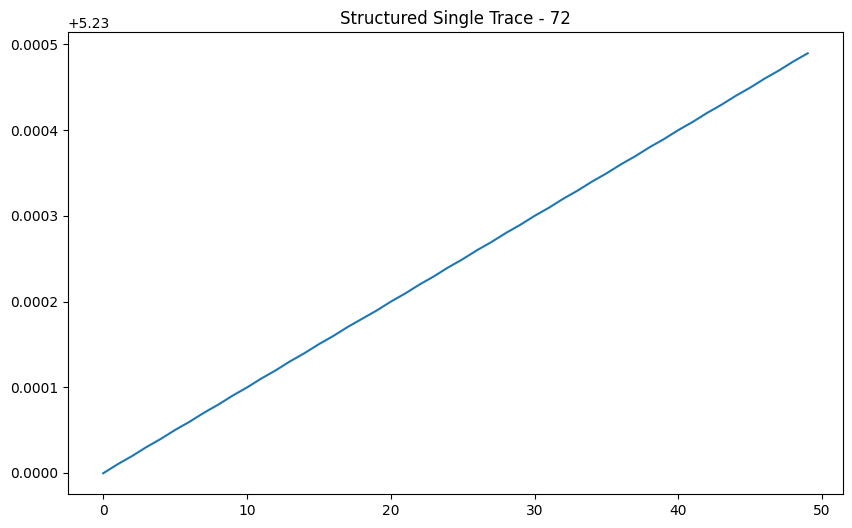

In [5]:
def plot_seismic_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(data, cmap='seismic', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.show()

idx = random.randint(0, len(dataset_traces)-1)
plt.figure(figsize=(10, 6))
plt.plot(dataset_traces[idx])
plt.title('Structured Single Trace - {}'.format(idx))
plt.show()

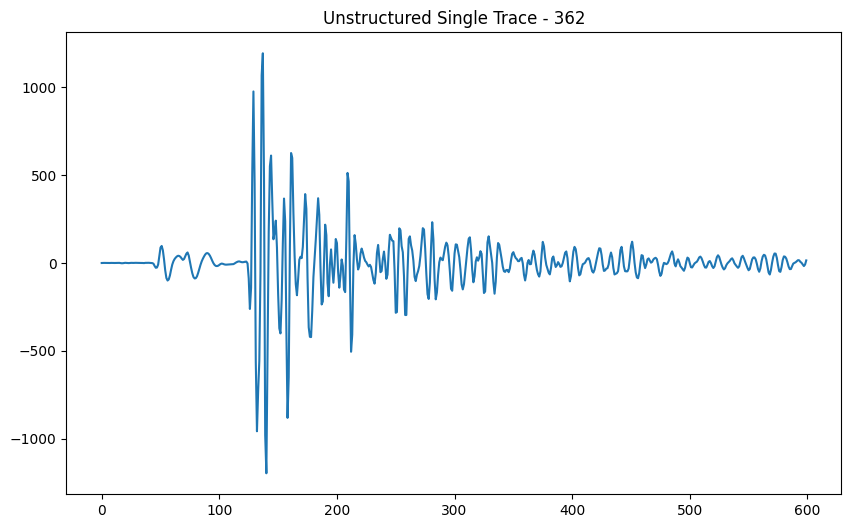

In [6]:
idx = random.randint(0, len(dataset_traces_unstruc)-1)
plt.figure(figsize=(10, 6))
plt.plot(dataset_traces_unstruc[idx])
plt.title('Unstructured Single Trace - {}'.format(idx))
plt.show()

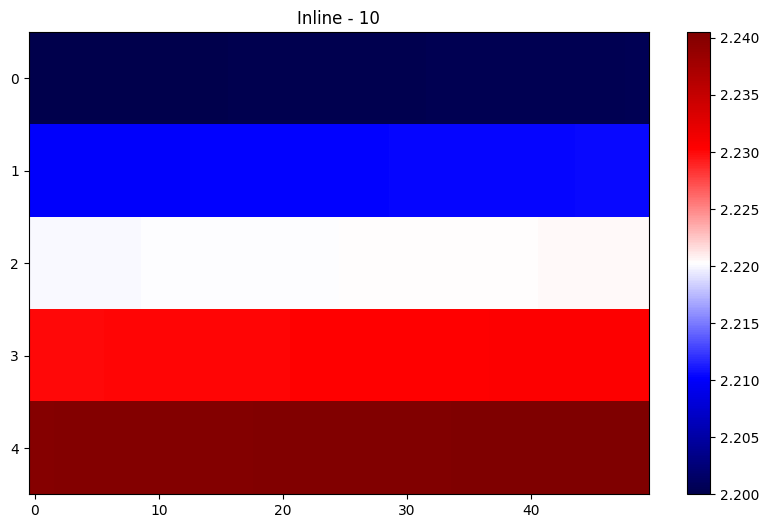

In [7]:
idx = random.randint(0, len(dataset_inline)-1)
plot_seismic_data(dataset_inline[idx], 'Inline - {}'.format(idx))

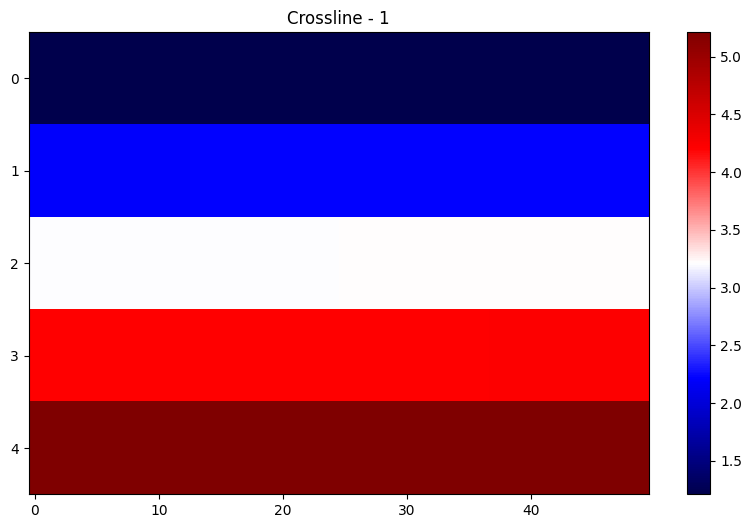

In [8]:
idx = random.randint(0, len(dataset_xline)-1)
plot_seismic_data(dataset_xline[idx], 'Crossline - {}'.format(idx))

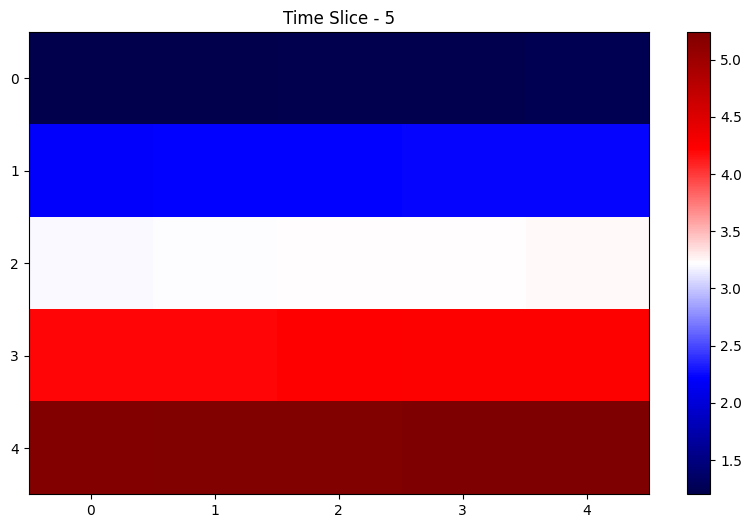

In [9]:
idx = random.randint(0, len(dataset_time)-1)
plot_seismic_data(dataset_time[idx], 'Time Slice - {}'.format(idx))

## Test with DataLoader

In [10]:
dataloader = DataLoader(dataset_traces, batch_size=8, shuffle=True, collate_fn=dataset_traces.padded_collate)

for i, batch in enumerate(dataloader):
    print(f"Batch {i+1} shape: {batch[0].shape}")
    # print (batch[0])
    if i == 2:  # Print first 3 batches
        break

Batch 1 shape: torch.Size([8, 50])
Batch 2 shape: torch.Size([8, 50])
Batch 3 shape: torch.Size([8, 50])


In [11]:
dataloader = DataLoader(dataset_inline, batch_size=8, shuffle=True, collate_fn=dataset_inline.padded_collate)

for i, batch in enumerate(dataloader):
    print(f"Batch {i+1} shape: {batch[0].shape}")
    # print (batch[0])
    if i == 2:  # Print first 5 batches
        break

Batch 1 shape: torch.Size([8, 5, 50])
Batch 2 shape: torch.Size([6, 5, 50])


### Test Transforms

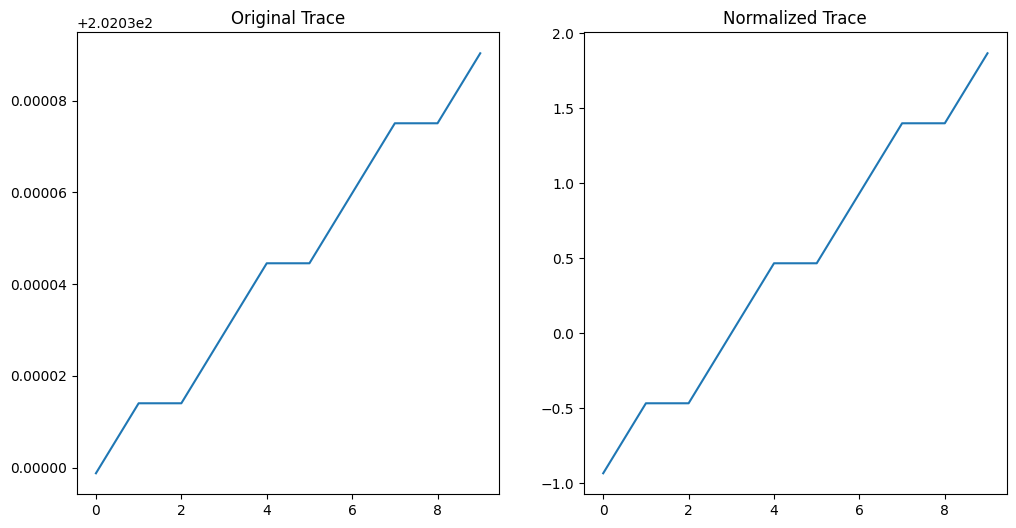

In [16]:
def normalize(data):
    return (data - np.mean(data)) / np.std(data)


dataset_with_transform = SeismicDataset(segy_dir, mode='traces', transform=[normalize])
idx = random.randint(0, len(dataset_with_transform)-1)

original_trace = dataset_traces[idx]
transformed_trace = dataset_with_transform[idx]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(original_trace)
plt.title('Original Trace')
plt.subplot(1, 2, 2)
plt.plot(transformed_trace)
plt.title('Normalized Trace')
plt.show()

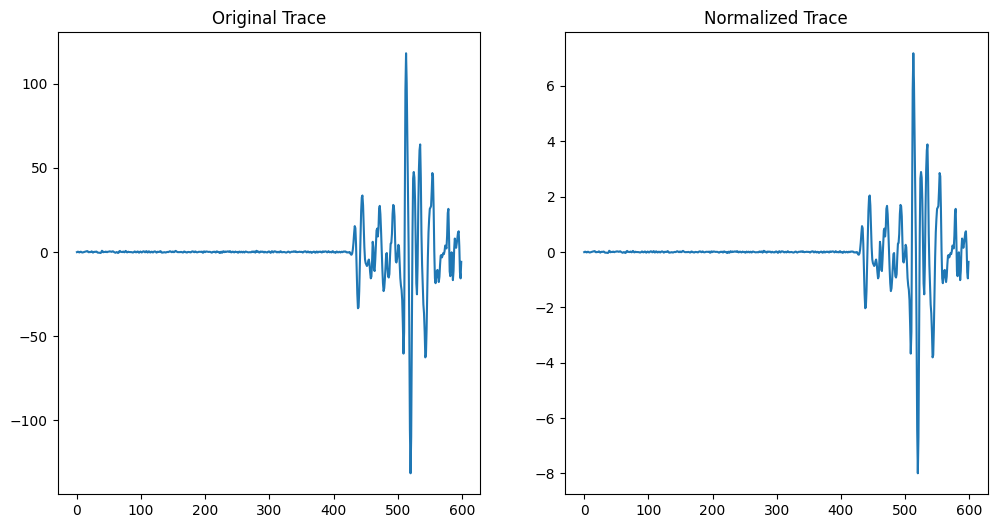

In [15]:
unstruc_dataset = SeismicDataset(segy_dir_2, False, mode='traces')
unstruc_dataset_with_transform = SeismicDataset(segy_dir_2, False, mode='traces', transform=[normalize])

idx = random.randint(0, len(unstruc_dataset_with_transform)-1)

original_trace = unstruc_dataset[idx]
transformed_trace = unstruc_dataset_with_transform[idx]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(original_trace)
plt.title('Original Trace')
plt.subplot(1, 2, 2)
plt.plot(transformed_trace)
plt.title('Normalized Trace')
plt.show()

### Test Error Handling

In [18]:
try:
    data = dataset_traces[len(dataset_traces)+5]
except IndexError as e:
    print(f"Caught expected error: {e}")

try:
    invalid_dataset = SeismicDataset(segy_dir, mode='huh?')
except ValueError as e:
    print(f"Caught expected error: {e}")

Error accessing data at index 79: list index out of range
Caught expected error: ('Invalid mode. Must be one of ', ['traces', 'inline', 'xline', 'time'])
